In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [193]:
Erecoil_keV = 99
slope = -1/(0.16*np.log(Erecoil_keV)) #0.4
angle_rad = np.arctan(slope)
print ("slope, angle (rad): ", slope, ", ", angle_rad)

mu_x = 0.16
mu_y = 0.18
sig_x = 0.07 #0.2
sig_y = 0.11 #slope*sig_x

intercept = mu_y - slope*mu_x

slope, angle (rad):  -1.3601386261594328 ,  -0.9368222514985171


In [204]:
def getCov_fromCoeff(a, b, c):
    Var_x = 4*np.pi/(np.sqrt(c)*np.power(4*a - b**2/c ,3/2))
    Var_y = 4*np.pi*a/np.power(4*a*c - b**2 ,3/2)
    Var_xy = 2*np.pi*b/np.power(4*a*c - b**2 ,3/2)
    
    return [[Var_x, Var_xy], [Var_xy, Var_y]]

def getCoeff(sig_x, sig_y, theta):
    a = np.power(np.cos(theta),2)/(2*sig_x*sig_x) + np.power(np.sin(theta),2)/(2*sig_y*sig_y)
    b = 2*np.cos(theta)*np.sin(theta)/(2*sig_y*sig_y) - 2*np.cos(theta)*np.sin(theta)/(2*sig_x*sig_x)
    c = np.power(np.cos(theta),2)/(2*sig_y*sig_y) + np.power(np.sin(theta),2)/(2*sig_x*sig_x)
    
    return a, b, c
    
def getCov(sig_x, sig_y, theta):
    a, b, c = getCoeff(sig_x, sig_y, theta)
    return getCov_fromCoeff(a, b, c)

def evalBivariatePDF(energies_keV, mu_x, mu_y, sig_x, sig_y, A, B):
    pdf_arr = []
    
    for Erecoil_keV in energies_keV:
        slope = -1/(0.16*np.log(Erecoil_keV))
        theta = np.arctan(slope) + np.pi/2
        cov_matrix = getCov(sig_x, sig_y, theta)
        rv = multivariate_normal([mu_x, mu_y], cov_matrix)
        pdf_arr.append(rv.pdf([[A, B]]))
        
    return pdf_arr



In [205]:
x_dat = np.linspace(-3, 3, 10, endpoint=False)
y_dat = intercept + x_dat * slope
#print (x_dat, y_dat)

-0.006664679268181222
[[0.0003592900534111379, -0.00016624358525663943], [-0.00016624358525663943, 0.00046317890329866993]]
maximum value:  427.2271194229121


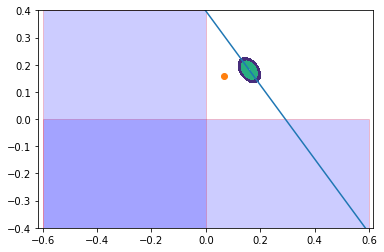

In [206]:
print(slope*sig_x**2)
a = slope*sig_x**2#0.11
angle = angle_rad + np.pi/2
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
cmatrix = getCov(sig_x,sig_y,angle)
print(cmatrix)
#rv = multivariate_normal([mu_x, mu_y], [[sig_x**2, a], [a, sig_y**2]])
rv = multivariate_normal([mu_x, mu_y], cmatrix)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos),[0.1*np.max(rv.pdf(pos)), 0.3*np.max(rv.pdf(pos)), 0.9*np.max(rv.pdf(pos))])
ax2.axis('equal')
print ('maximum value: ', np.max(rv.pdf(pos)))
evalBivariatePDF([22, 99], mu_x, mu_y, sig_x, sig_y, mu_x, mu_y)
plt.plot(x_dat, y_dat)
plt.ylim(-0.4, 0.4)
plt.xlim(-0.4, 0.4)

plt.fill([-0.6,0.6,0.6,-0.6], [-0.4,-0.4,0,0], 'b', alpha=0.2, edgecolor='r')
plt.fill([-0.6,0,0,-0.6], [-0.4,-0.4,0.4,0.4], 'b', alpha=0.2, edgecolor='r')

plt.plot(0.066, 0.1599, 'o')